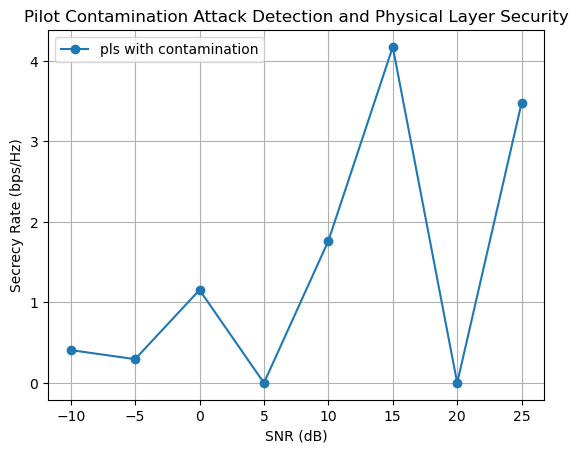

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Parameters
Nt = 4  # Transmit antennas
Nr = 2  # Bob's receive antennas
Ne = 2  # Eve's receive antennas
SNR_dB = np.arange(-10, 30, 5)  # SNR range in dB
num_nodes = 10  # Wireless nodes (representing users)

# Channel Estimation without Pilot Contamination
def channel_estimation_without_pilot_contamination():
    H_bob = np.random.randn(Nr, Nt) / np.sqrt(2)  # Legitimate user channel
    H_eve = np.random.randn(Ne, Nt) / np.sqrt(2)  # Eavesdropper channel
    return H_bob, H_eve

# Channel Estimation with Pilot Contamination (Eve attacks with pilots)
def channel_estimation_with_pilot_contamination():
    H_bob = np.random.randn(Nr, Nt) / np.sqrt(2)  # Legitimate user channel
    H_eve = np.random.randn(Ne, Nt) / np.sqrt(2)  # Eavesdropper channel
    contamination = np.random.randn(Ne, Nt) * 0.5  # Eavesdropper's contaminated pilots
    H_bob_contaminated = H_bob + contamination  # Contaminated channel at Bob
    return H_bob_contaminated, H_eve

# Detect Pilot Contamination using PCA or KMeans
def detect_pilot_contamination(H_bob_contaminated):
    # Use PCA to reduce dimensionality and detect anomalies (e.g., contamination)
    pca = PCA(n_components=2)
    H_pca = pca.fit_transform(H_bob_contaminated)
    
    # Use KMeans to cluster and detect contamination
    kmeans = KMeans(n_clusters=2, n_init=10)  # Explicitly set n_init to 10 (or use a suitable value)
    labels = kmeans.fit_predict(H_pca)
    
    if np.sum(labels) > len(labels) / 2:
        return "Pilot Contamination Detected"
    else:
        return "No Contamination Detected"

# Simulate Channel Estimation with and without Pilot Contamination
secrecy_rates = []
for snr_db in SNR_dB:
    snr = 10 ** (snr_db / 10)
    signal_power = 0.7 * snr
    noise_power = 0.3 * snr
    
    # Simulate channel estimation without pilot contamination
    H_bob, H_eve = channel_estimation_without_pilot_contamination()
    
    # Simulate channel estimation with pilot contamination
    H_bob_contaminated, H_eve = channel_estimation_with_pilot_contamination()
    
    # Detect pilot contamination
    contamination_status = detect_pilot_contamination(H_bob_contaminated)
    
    # Compute Secrecy Rate based on channel estimation
    if contamination_status == "Pilot Contamination Detected":
        secrecy_rate = 0  # Set secrecy rate to 0 if contamination is detected
    else:
        signal_bob = np.linalg.norm(H_bob @ H_bob.T) ** 2 * signal_power
        noise_bob = Nr  # Assume normalized noise variance
        rate_bob = np.log2(1 + signal_bob / noise_bob)
        
        signal_eve = np.linalg.norm(H_eve @ H_eve.T) ** 2 * signal_power
        noise_eve = Ne
        rate_eve = np.log2(1 + signal_eve / noise_eve)
        
        secrecy_rate = max(rate_bob - rate_eve, 0)  # Ensure non-negative secrecy rate
    
    secrecy_rates.append(secrecy_rate)

# Plot Secrecy Rate vs. SNR
plt.plot(SNR_dB, secrecy_rates, marker='o', label='pls with contamination')
plt.xlabel("SNR (dB)")
plt.ylabel("Secrecy Rate (bps/Hz)")
plt.title("Pilot Contamination Attack Detection and Physical Layer Security")
plt.legend()
plt.grid()
plt.show()
